<a href="https://colab.research.google.com/github/sameekshya1999/-Seven-segment-display-using-ripple-counter-and-de-10-nano/blob/main/nextword_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
#Step 2: Load your file
from google.colab import files
uploaded = files.upload()

Saving cinderella.txt to cinderella.txt


### Step 3: Open and pre-process the data

In [4]:
#Step 3: Open and pre-process the data
file = open("cinderella.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:700]

"Cinderella: A Tale of Hope and Kindness Once upon a time, in a faraway land, there was a kind and gentle girl named Cinderella. She lived with her wicked stepmother and two stepsisters. Cinderella’s stepmother didn’t like her because she was kind-hearted and beautiful, unlike her own daughters, who were selfish and mean. Hard Life at Home Cinderella's father had passed away, leaving her alone with her stepmother and stepsisters. They made her do all the household chores, from scrubbing the floors to washing clothes and cooking meals. Cinderella had no choice but to obey them. Despite her hard work, they treated her poorly, giving her only old clothes to wear and making her sleep near the col"

In [5]:
len(data)

5703

### Step 4: Implement tokenization and make additional adjustments

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[6, 7, 131, 11, 132, 3, 67, 133, 134, 7, 68, 9, 7, 135, 136]

In [7]:
len(sequence_data)

972

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

379


In [9]:
sequences = []
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  969


array([[  6,   7, 131,  11],
       [  7, 131,  11, 132],
       [131,  11, 132,   3],
       [ 11, 132,   3,  67],
       [132,   3,  67, 133],
       [  3,  67, 133, 134],
       [ 67, 133, 134,   7],
       [133, 134,   7,  68],
       [134,   7,  68,   9],
       [  7,  68,   9,   7]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[  6   7 131]
 [  7 131  11]
 [131  11 132]
 [ 11 132   3]
 [132   3  67]
 [  3  67 133]
 [ 67 133 134]
 [133 134   7]
 [134   7  68]
 [  7  68   9]]
Response:  [ 11 132   3  67 133 134   7  68   9   7]


In [11]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Split your data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

### Step 5: Creating the model

In [22]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(Dropout(0.2))  #extra one
model.add(LSTM(1000))
model.add(Dropout(0.2))  #extra one
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
#GRU model
gru_model = Sequential()
gru_model.add(Embedding(vocab_size, 10, input_length=3))
gru_model.add(GRU(1000, return_sequences=True))   # Add a GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(GRU(1000))    # Add another GRU layer with 1000 units
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
gru_model.add(Dense(vocab_size, activation="softmax"))   # Add the output Dense layer with vocab_size units and softmax activation
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Bidirectional LSTM

Bi_model = Sequential()  # Create a Sequential model
Bi_model.add(Embedding(vocab_size, 10, input_length=3))   # Add an Embedding layer
Bi_model.add(Bidirectional(LSTM(1000, return_sequences=True)))   # Add a Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Bidirectional(LSTM(1000)))     # Add another Bidirectional LSTM layer with 1000 units
Bi_model.add(Dropout(0.2))
Bi_model.add(Dense(1000, activation="relu"))    # Add a Dense layer with 1000 units and ReLU activation
Bi_model.add(Dense(vocab_size, activation="softmax"))    # Add the output Dense layer with vocab_size units and softmax activation
Bi_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 6: Plot the model

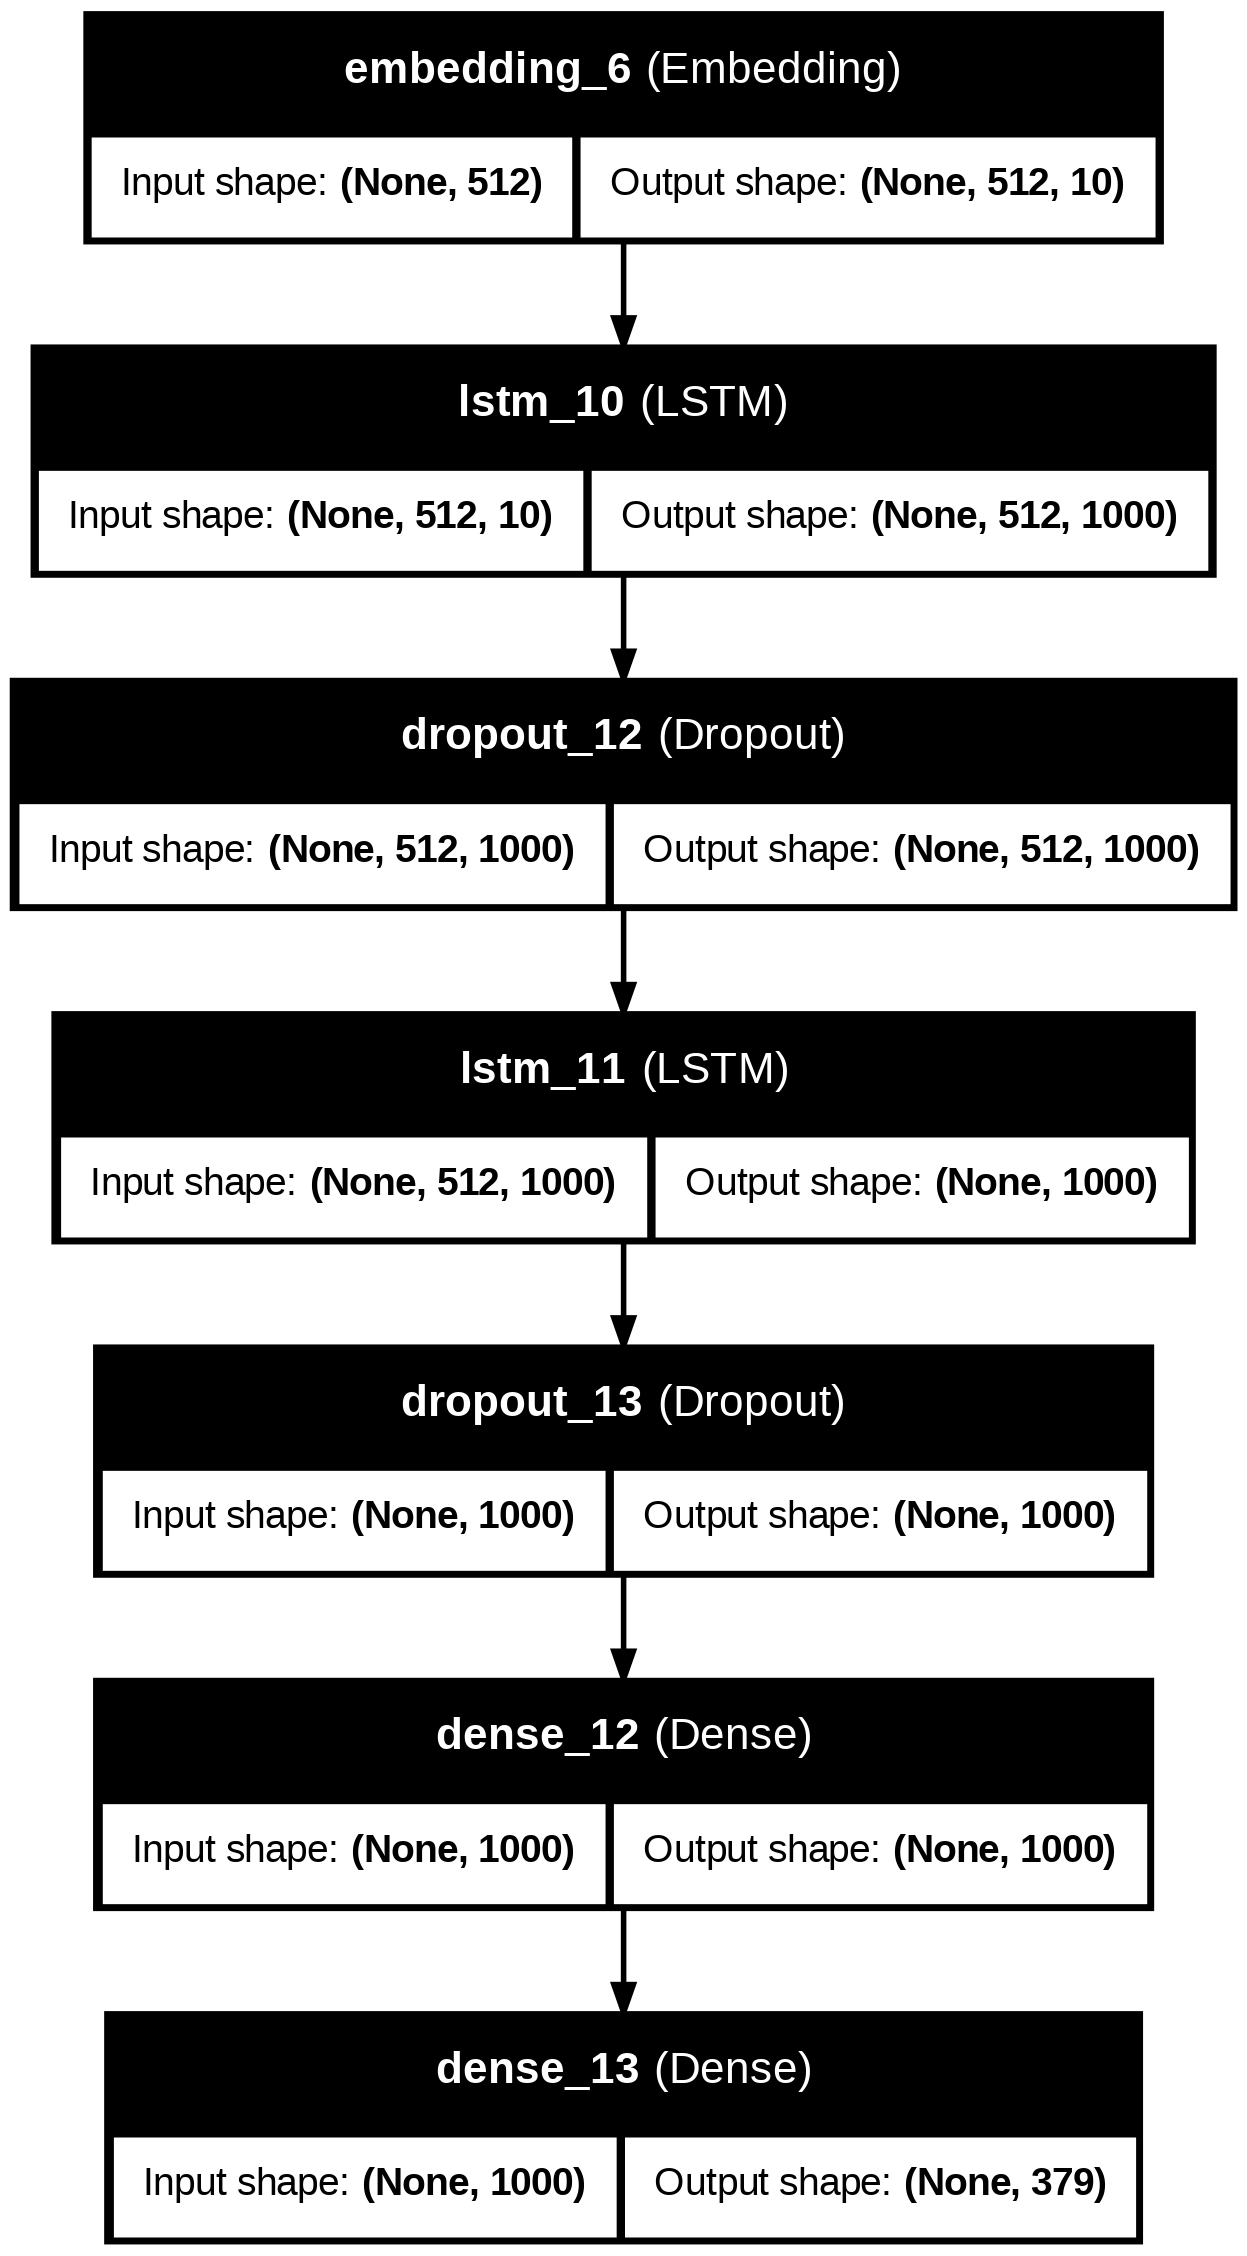

In [23]:
# Assuming the input shape is (batch_size, 512)
model.build(input_shape=(None, 512))  # Replace 512 with your sequence length if different

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='plot.png', show_layer_names=True, show_shapes=True)


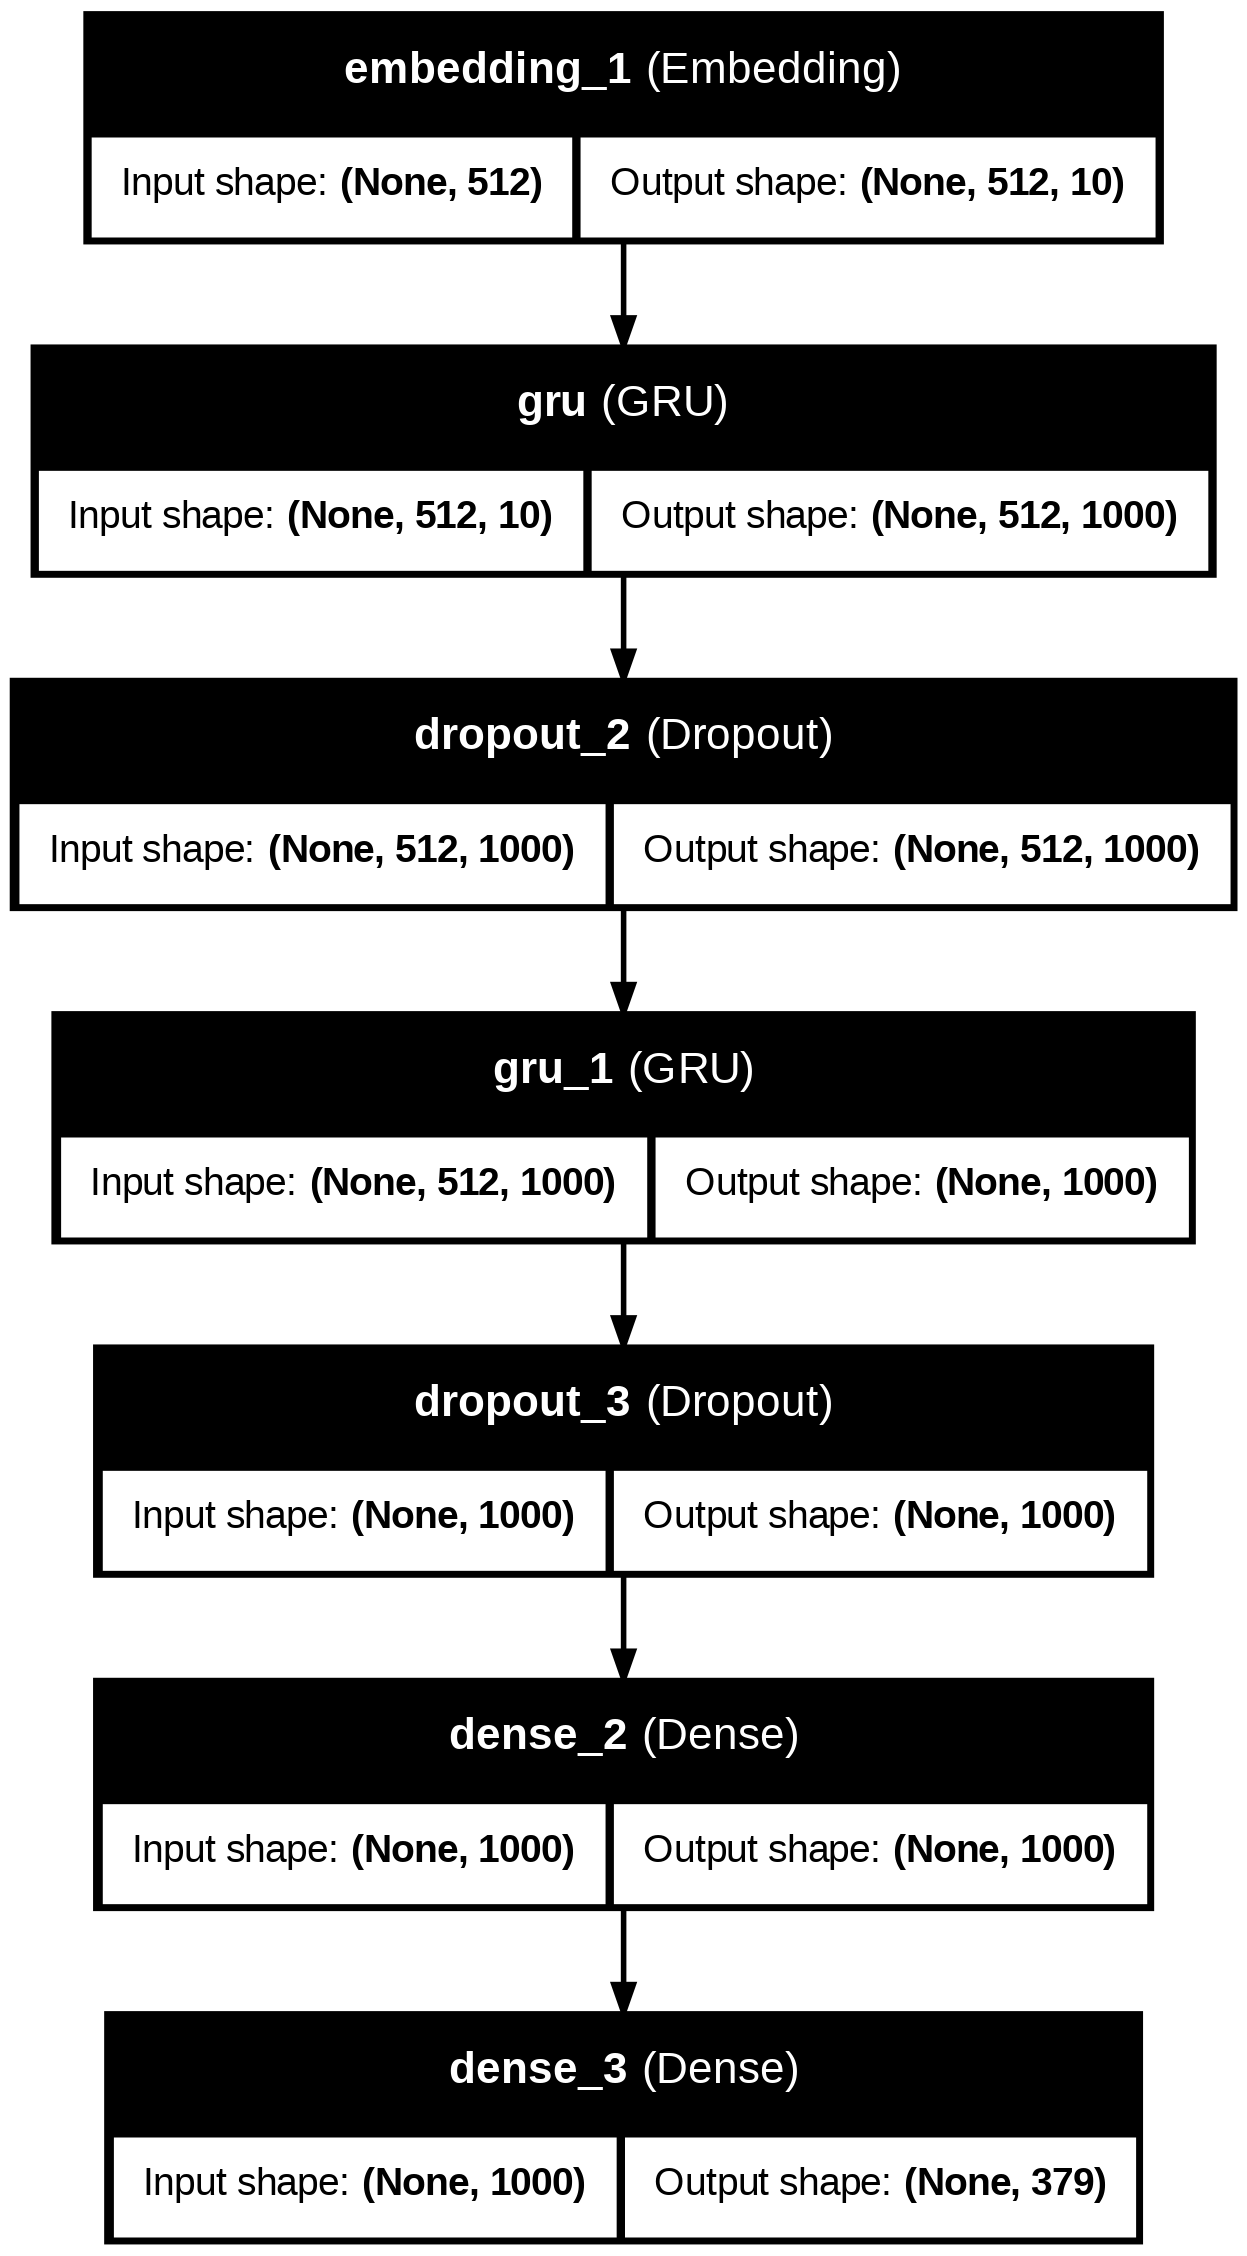

In [25]:
# Assuming your GRU model has a sequence length of 512
gru_model.build(input_shape=(None, 512))  # Replace 512 with your actual sequence length

from tensorflow.keras.utils import plot_model
plot_model(gru_model, to_file='plot1.png', show_layer_names=True, show_shapes=True)


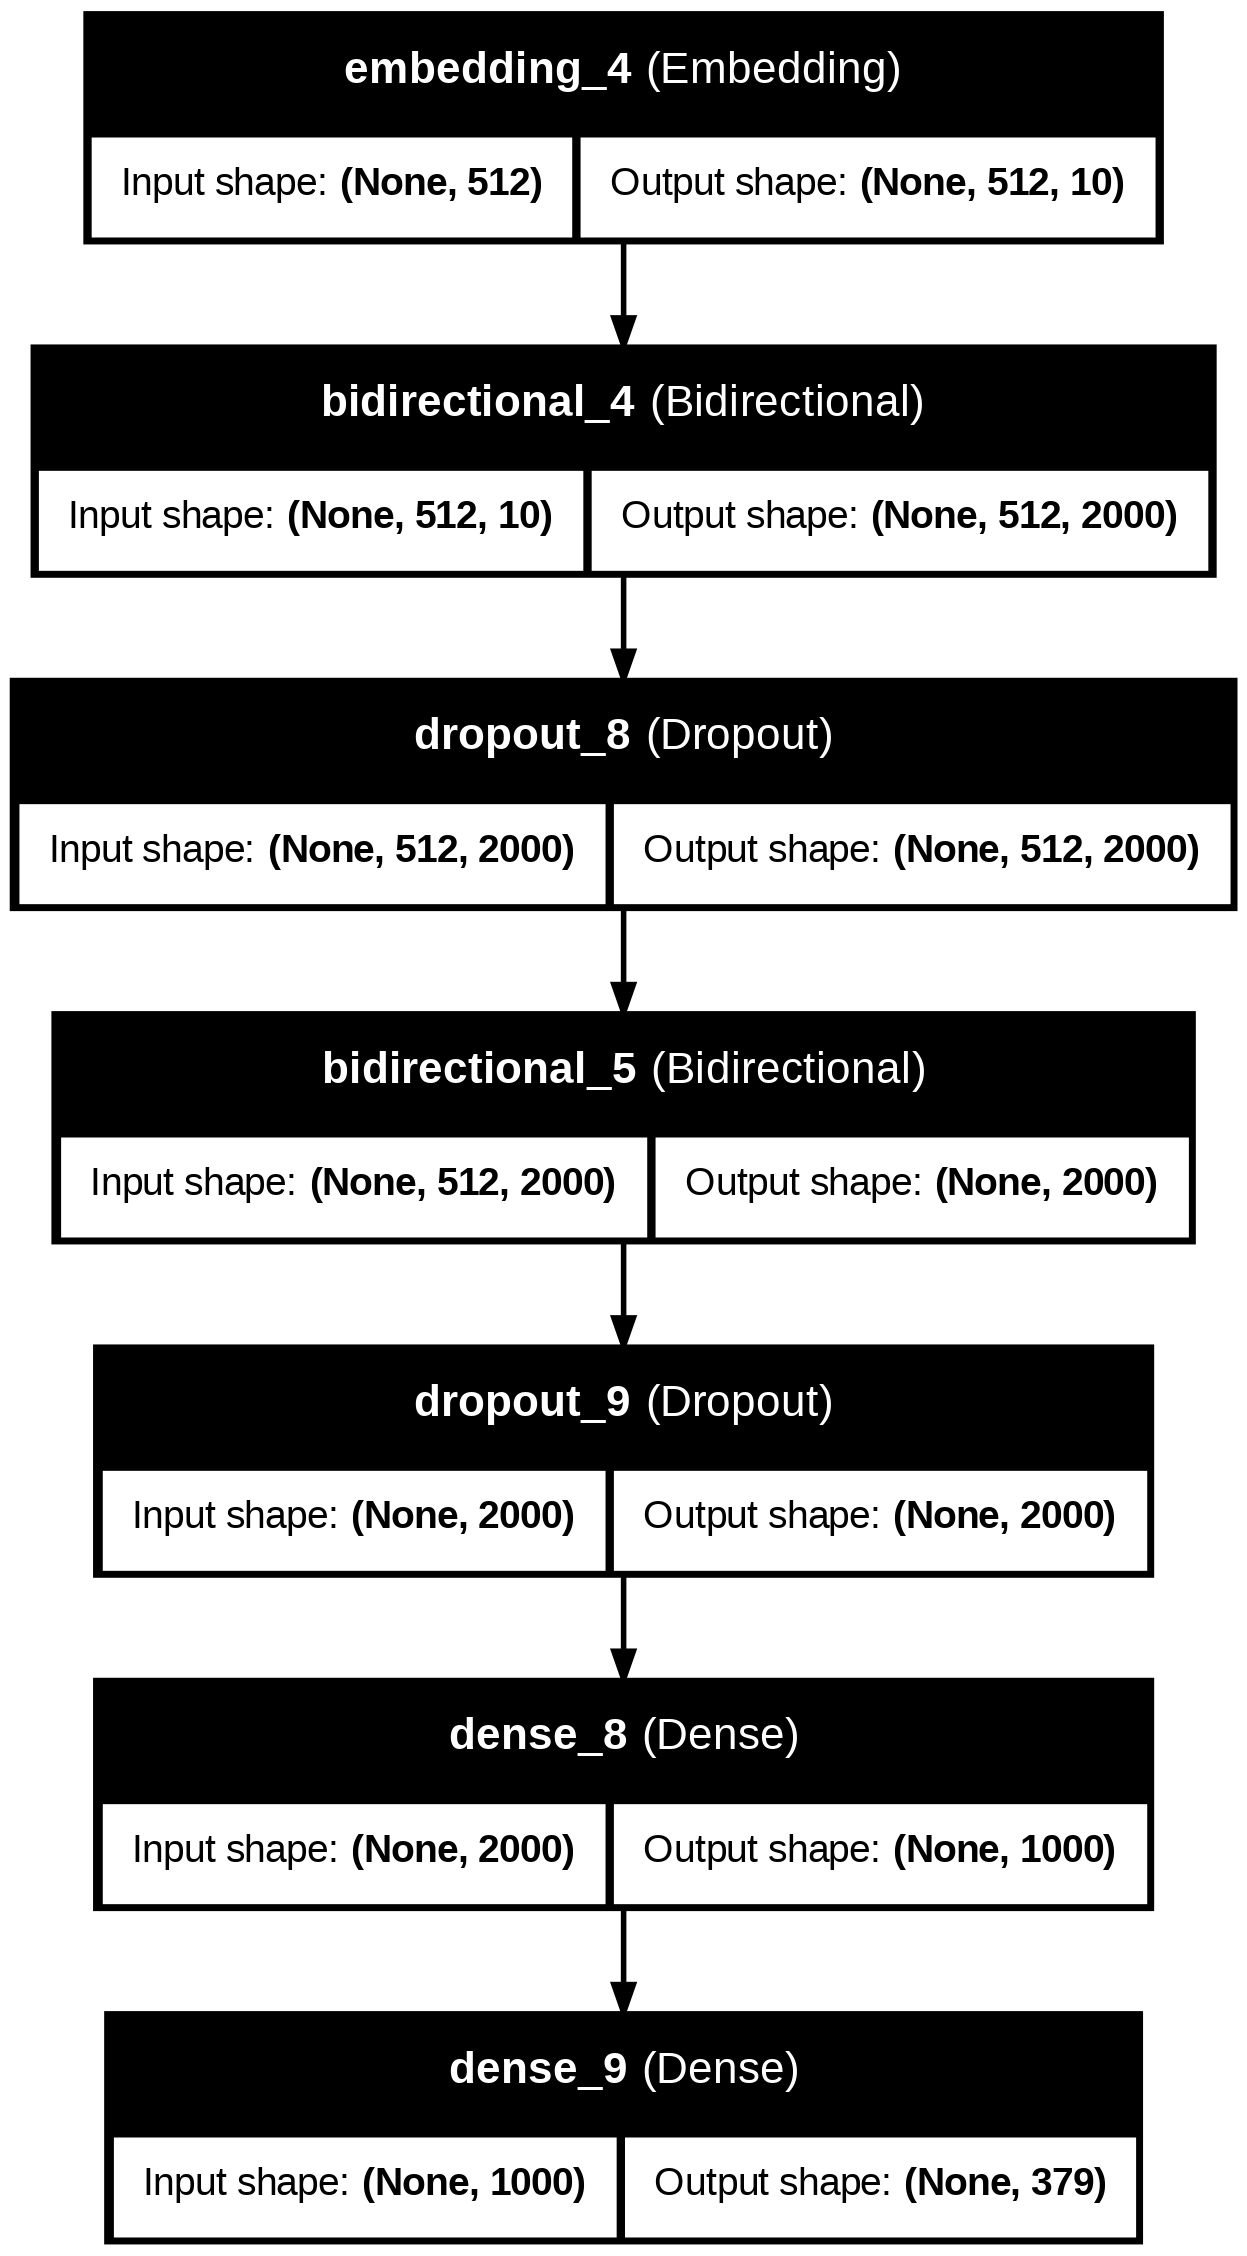

In [27]:
# Assuming your Bi_model has a sequence length of 512
Bi_model.build(input_shape=(None, 512))  # Replace 512 with your actual sequence length

from tensorflow.keras.utils import plot_model
plot_model(Bi_model, to_file='plot2.png', show_layer_names=True, show_shapes=True)


### Step 7: Train the model

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Define the checkpoint callback with the .keras extension
checkpoint = ModelCheckpoint("next_words.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=50, callbacks=[checkpoint])


Epoch 1/30
15/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0546 - loss: 5.8847
Epoch 1: loss improved from inf to 5.75799, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.0559 - loss: 5.8634
Epoch 2/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0503 - loss: 5.2766
Epoch 2: loss improved from 5.75799 to 5.30274, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.0497 - loss: 5.2795
Epoch 3/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0649 - loss: 5.2184
Epoch 3: loss improved from 5.30274 to 5.17408, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0655 - loss: 5.2135
Epoch 4/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0490 - loss: 5.1450
Epoch 4: loss improved from 5.17408 to 5.08961, saving model to next_words.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.0505 - loss: 5.1389
Epoch 5/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20

In [33]:
#GRU model

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint("next_words_gru.keras", monitor='loss', verbose=1, save_best_only=True)
gru_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])   # Compile the GRU model
gru_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])     # Train the GRU model

Epoch 1/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9463 - loss: 0.1701
Epoch 1: loss improved from inf to 0.23730, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - accuracy: 0.9438 - loss: 0.1775
Epoch 2/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9598 - loss: 0.1408
Epoch 2: loss improved from 0.23730 to 0.18649, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9575 - loss: 0.1459
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9583 - loss: 0.1302
Epoch 3: loss improved from 0.18649 to 0.16373, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.9575 - loss: 0.1320
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9772 - loss: 0.0837
Epoch 4: loss improved from 0.16373 to 0.12141, saving model to next_words_gru.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9763 - loss: 0.0858
Epoch 5/40
17/17 ━━━━━━━━━

In [35]:
# Bidirectional LSTM
checkpoint = ModelCheckpoint("next_words_bi_lstm.keras", monitor='loss', verbose=1, save_best_only=True)

# Compile the Bidirectional LSTM model
Bi_model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the Bidirectional LSTM model (replace X_train and y_train with your data)
Bi_model.fit(X_train, y_train, epochs=40, batch_size=50, callbacks=[checkpoint])

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0407 - loss: 5.8288
Epoch 1: loss improved from inf to 5.67245, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.0418 - loss: 5.8201
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0563 - loss: 5.2515
Epoch 2: loss improved from 5.67245 to 5.29000, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - accuracy: 0.0565 - loss: 5.2537
Epoch 3/40
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0562 - loss: 5.2270
Epoch 3: loss improved from 5.29000 to 5.15650, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.0578 - loss: 5.2192
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0672 - loss: 5.1154
Epoch 4: loss improved from 5.15650 to 5.05117, saving model to next_words_bi_lstm.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - accuracy: 0.0674 - loss: 5.1119
Epoch 5/

In [38]:
# Load the LSTM model from the checkpoint
model = load_model("next_words.keras")

# Evaluate the LSTM model on the test data
lstm_test_loss, lstm_test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy for the LSTM model
print("LSTM Test Accuracy:", lstm_test_accuracy)

# Load the GRU model from the checkpoint
gru_model = load_model("next_words_gru.keras")

# Evaluate the GRU model on the test data
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test)

# Print the test accuracy for the GRU model
print("GRU Test Accuracy:", gru_test_accuracy)

# Load the Bidirectional LSTM model from the checkpoint
bi_model = load_model("next_words_bi_lstm.keras")

# Evaluate the Bidirectional LSTM model on the test data
bi_test_loss, bi_test_accuracy = bi_model.evaluate(X_test, y_test)

# Print the test accuracy for the Bidirectional LSTM model
print("Bidirectional LSTM Test Accuracy:", bi_test_accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0389 - loss: 17.9448  
LSTM Test Accuracy: 0.04109589010477066
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0669 - loss: 32.4735  
GRU Test Accuracy: 0.054794520139694214
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0570 - loss: 39.1618
Bidirectional LSTM Test Accuracy: 0.06164383515715599


### Step 8: Let’s predict

In [41]:
# Load the model and tokenizer
model = load_model('next_words_bi_lstm.keras')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

In [40]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: But when her stepsisters saw her in the
['her', 'in', 'the']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
dress
Enter your line: The Fairy Godmother
['The', 'Fairy', 'Godmother']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
smiled
Enter your line: When Cinderella arrived at the palace
['at', 'the', 'palace']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
everyone
Enter your line: Just as the Prince was about to ask for her name
['for', 'her', 'name']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
the
Enter your line: my name is samiksha
['name', 'is', 'samiksha']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
the
Enter your line: 0
Execution completed.....
